In [1]:
## loading of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
###Loading of Dataset
data = pd.read_csv("stock_prices_with_indicators.csv")

In [3]:
data.head(5)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            15502 non-null  object 
 1   date              15502 non-null  object 
 2   open              15502 non-null  float64
 3   high              15502 non-null  float64
 4   low               15502 non-null  float64
 5   close             15502 non-null  float64
 6   volume            15502 non-null  float64
 7   adjusted_close    15502 non-null  float64
 8   sma_20            15192 non-null  float64
 9   sma_50            15502 non-null  float64
 10  sma_200           15502 non-null  float64
 11  ema_12            15502 non-null  float64
 12  ema_26            15502 non-null  float64
 13  macd              15191 non-null  float64
 14  macd_signal       15502 non-null  float64
 15  macd_histogram    15502 non-null  float64
 16  rsi_14            15172 non-null  float6

In [5]:
##Checking of the data size
data.shape

(15502, 31)

In [6]:
total_duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 0


##  I have confirmed there is no duplicate in this dataset, and I shall proceed with working on missing values and outliers

In [7]:
## Data description
data.describe()

,open,high,low,close,volume,adjusted_close,sma_20,sma_50,sma_200,ema_12,...,bb_width,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d
count,15502.000000,15502.000000,15502.000000,15502.000000,1.550200e+04,15502.000000,15192.000000,15502.000000,15502.000000,15502.000000,...,15171.000000,15502.000000,15502.000000,1.550200e+04,15192.000000,15302.000000,15102.000000,15502.000000,15462.000000,15502.000000
mean,102.408860,104.210076,100.685710,102.447796,1.255806e+06,102.447796,102.145547,101.370939,99.078231,102.205225,...,16.282274,3.731157,3.718369,1.245795e+06,1.000063,0.005172,0.010515,0.007683,0.022965,0.002466
std,58.524307,59.610521,57.519995,58.583470,3.880426e+05,58.583470,57.549051,55.626918,49.001519,57.851272,...,13.645730,2.904011,2.330653,5.659106e+04,0.167556,0.075902,0.108675,0.096457,0.007044,0.053491
min,21.060000,22.080000,21.060000,21.440000,8.018930e+05,21.440000,22.808000,23.391200,25.758150,22.611917,...,0.113137,0.270000,0.650000,8.854700e+05,0.608932,-0.283947,-0.417187,-0.376681,0.001749,-0.635318
25%,63.350000,64.432500,62.235000,63.332500,1.069136e+06,63.332500,63.007500,64.068350,66.673452,62.982891,...,7.937950,1.870000,2.158571,1.207038e+06,0.864243,-0.042132,-0.058712,-0.050586,0.017978,-0.030752
50%,88.540000,90.090000,87.155000,88.650000,1.249854e+06,88.650000,88.149250,87.822600,86.859500,88.338272,...,12.344552,2.970000,3.128929,1.243692e+06,1.001132,0.004793,0.009213,0.007012,0.021983,0.002061
75%,131.052500,132.977500,128.850000,130.967500,1.420747e+06,130.967500,130.658125,130.193450,127.921712,130.549266,...,19.921944,4.620000,4.653571,1.282458e+06,1.131701,0.051565,0.078204,0.068663,0.026906,0.035708
max,512.090000,516.020000,497.210000,509.110000,1.399696e+07,509.110000,489.384000,470.320200,383.890800,494.758062,...,124.994567,39.530000,19.738571,1.578011e+06,1.574700,0.370482,0.669193,0.427233,0.065473,0.245885


In [8]:
### As crucial in this project, date and time is essential and should maintain a normal pandas formular

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

In [9]:
## This line prepares my dataset to behave like a proper time-series — 
## perfectly ordered by stock and by time, ready for indicator computation and modeling.

data = data.sort_values(['ticker','date']).reset_index(drop=True)


In [10]:
# Check if dates are sorted correctly for each ticker
sorted_check = (
    data.groupby('ticker')['date']
        .apply(lambda x: x.is_monotonic_increasing)
)

print(sorted_check)


ticker
STK001    True
STK002    True
STK003    True
STK004    True
STK005    True
STK006    True
STK007    True
STK008    True
STK009    True
STK010    True
STK011    True
STK012    True
STK013    True
STK014    True
STK015    True
STK016    True
STK017    True
STK018    True
STK019    True
STK020    True
Name: date, dtype: bool


In [11]:
### Checking for missing values in the datase
data.isnull().sum()

ticker                0
date                  0
open                  0
high                  0
low                   0
close                 0
volume                0
adjusted_close        0
sma_20              310
sma_50                0
sma_200               0
ema_12                0
ema_26                0
macd                311
macd_signal           0
macd_histogram        0
rsi_14              330
bb_middle             0
bb_upper             20
bb_lower             20
bb_width            331
true_range            0
atr_14                0
volume_sma_20         0
volume_ratio        310
momentum_10         200
momentum_20         400
price_to_sma_50       0
volatility_20        40
future_return_5d      0
trend_label           0
dtype: int64

In [12]:
# Check missing values
missing = data.isnull().sum().sort_values(ascending=False)
print("\nMissing values:\n", missing[missing > 0])


Missing values:
 momentum_20      400
bb_width         331
rsi_14           330
macd             311
volume_ratio     310
sma_20           310
momentum_10      200
volatility_20     40
bb_lower          20
bb_upper          20
dtype: int64


In [13]:
# Calculate percentage of missing values per column
missing_percent = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values:\n", missing_percent[missing_percent > 0].sort_values(ascending=False))


Percentage of missing values:
 momentum_20      2.580312
bb_width         2.135208
rsi_14           2.128758
macd             2.006193
sma_20           1.999742
volume_ratio     1.999742
momentum_10      1.290156
volatility_20    0.258031
bb_lower         0.129016
bb_upper         0.129016
dtype: float64


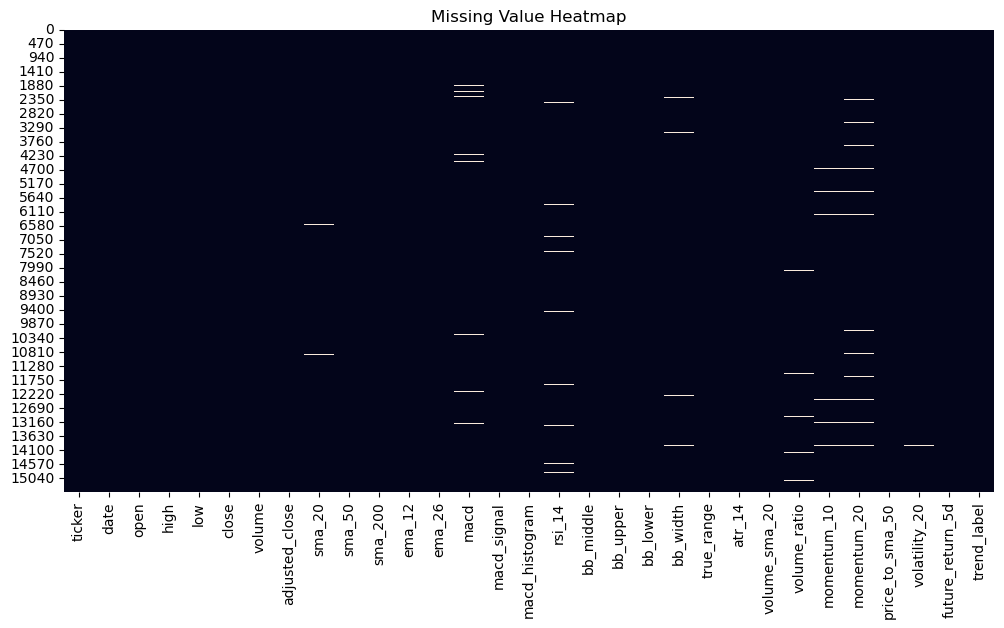

In [14]:
## Vistualizing the missing values

plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


In [15]:
## Handling my missing values

## Since the NaNs are all at the start of each ticker’s history, I am removing them safely:

# sort so early days come first
data = data.sort_values(["ticker", "date"])

# drop rows that have missing indicator values
cols_with_nans = ["momentum_20","bb_width","rsi_14","macd",
                  "volume_ratio","sma_20","momentum_10",
                  "volatility_20","bb_lower","bb_upper"]

data_clean = (
    data.groupby("ticker", group_keys=False)
        .apply(lambda x: x.dropna(subset=cols_with_nans))
        .reset_index(drop=True)
)

print("New shape:", data_clean.shape)
print("Remaining NaNs:", data_clean.isnull().sum().sum())


New shape: (13653, 31)
Remaining NaNs: 0


C:\Users\user\AppData\Local\Temp\ipykernel_25636\2749185311.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.dropna(subset=cols_with_nans))


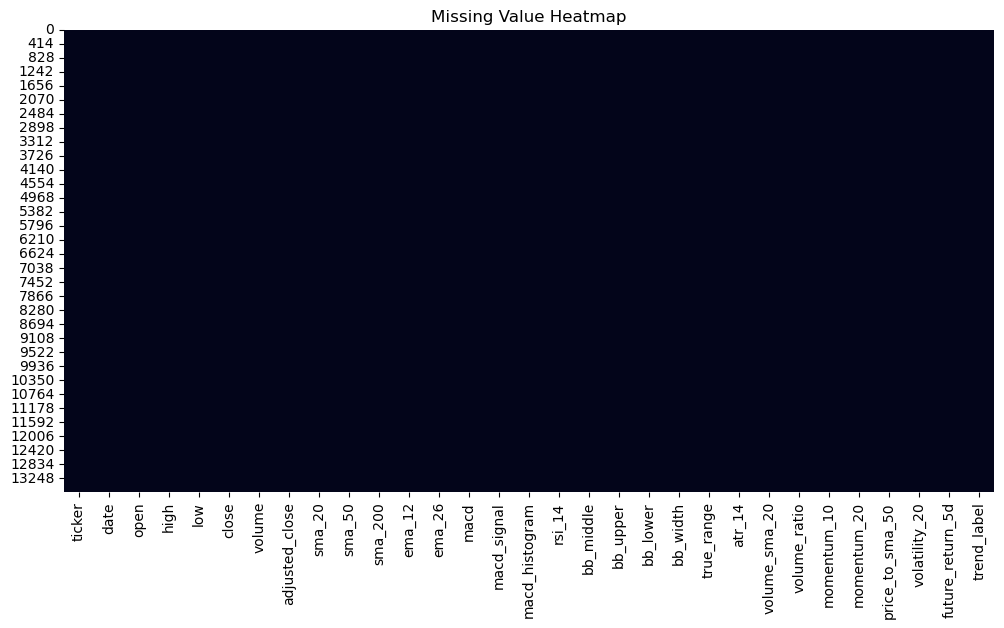

In [16]:
## Confirming I have a cleaned data
plt.figure(figsize=(12,6))
sns.heatmap(data_clean.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

In [17]:
## confirming my dataframe to be sure of any inconsistencies 
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13653 entries, 0 to 13652
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ticker            13653 non-null  object        
 1   date              13653 non-null  datetime64[ns]
 2   open              13653 non-null  float64       
 3   high              13653 non-null  float64       
 4   low               13653 non-null  float64       
 5   close             13653 non-null  float64       
 6   volume            13653 non-null  float64       
 7   adjusted_close    13653 non-null  float64       
 8   sma_20            13653 non-null  float64       
 9   sma_50            13653 non-null  float64       
 10  sma_200           13653 non-null  float64       
 11  ema_12            13653 non-null  float64       
 12  ema_26            13653 non-null  float64       
 13  macd              13653 non-null  float64       
 14  macd_signal       1365

## Dealing with outliers, bear in mind that we are working on only numerical values alone

In [23]:
num_cols = data_clean.select_dtypes(include='number').columns

Q1 = data_clean[num_cols].quantile(0.25)
Q3 = data_clean[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data_clean[num_cols] < (Q1 - 1.5 * IQR)) | 
            (data_clean[num_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum().sort_values(ascending=False)

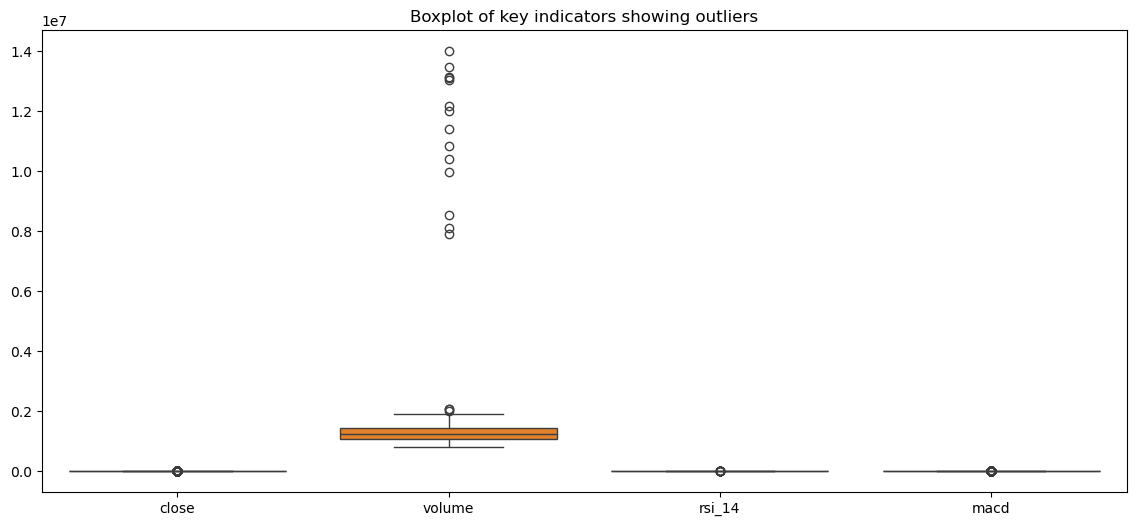

In [24]:
##Checking for outliers in the dataset

plt.figure(figsize=(14,6))
sns.boxplot(data=data_clean[['close','volume','rsi_14','macd']])
plt.title("Boxplot of key indicators showing outliers")
plt.show()

Volume has many outliers (lots of circles above the whiskers). These represent days with exceptionally high trading activity 
In financial data, this is expected — trading volume naturally spikes during key events.

| Indicator  | Outlier Pattern         | Likely Cause                       | Action                             |
| ---------- | ----------------------- | ---------------------------------- | ---------------------------------- |
| **Volume** | Many outliers above box | Real market surges or stock splits | Cap extreme spikes (winsorization) |
| **Close**  | Few mild points         | Small daily jumps                  | Likely fine                        |
| **RSI_14** | Few mild outliers       | Extreme momentum                   | Keep them (carry info)             |
| **MACD**   | Minor variation         | Momentum differences               | Keep or light cap                  |


In [25]:
# Cap extreme values at 1st and 99th percentile (Using Winsorization for Outliers)
for col in ['volume', 'rsi_14', 'macd', 'close']:
    lower, upper = data_clean[col].quantile([0.01, 0.99])
    data_clean[col] = data_clean[col].clip(lower, upper)


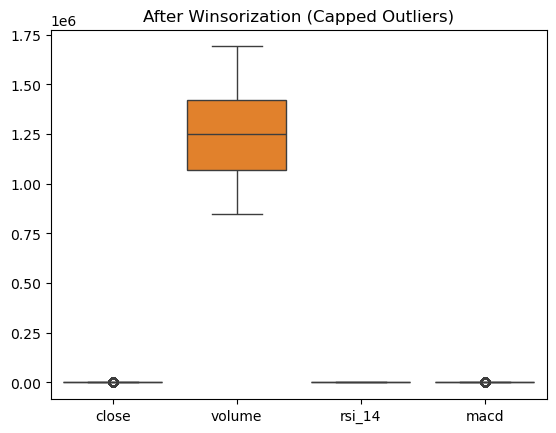

In [26]:
sns.boxplot(data=data_clean[['close','volume','rsi_14','macd']])
plt.title("After Winsorization (Capped Outliers)")
plt.show()


In [21]:
data_clean.head(3)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-02-01,150.74,154.29,150.74,152.81,1467983.0,152.81,157.5925,157.712381,...,3.87,5.467857,1230876.80,1.192632,-0.037357,-0.045594,-0.031084,0.017942,-0.022512,Downtrend
1,STK001,2021-02-03,151.25,151.25,145.94,148.28,1476629.0,148.28,156.4305,157.080870,...,6.68,5.292143,1237512.25,1.193224,-0.058958,-0.083447,-0.056028,0.018440,0.016388,Sideways
2,STK001,2021-02-04,150.23,150.23,144.72,147.07,1000828.0,147.07,155.4305,156.663750,...,5.51,5.407143,1210812.00,0.826576,-0.045682,-0.119710,-0.061238,0.016275,0.008703,Sideways


### Check for Missing Trading Days in the dataset

In [22]:
# Ensure date is in datetime format
data_clean['date'] = pd.to_datetime(data_clean['date'])

# Sort properly
data_clean = data_clean.sort_values(['ticker', 'date']).reset_index(drop=True)

# Calculate gaps between consecutive trading days for each ticker
data_clean['day_gap'] = data_clean.groupby('ticker')['date'].diff().dt.days

# Check for unexpected gaps (>3 days)
big_gaps = data_clean[data_clean['day_gap'] > 3]

if big_gaps.empty:
    print("✅ No unexpected gaps — all tickers have consistent trading days.")
else:
        print(big_gaps[['ticker', 'date', 'day_gap']].head(20))


     ticker       date  day_gap
18   STK001 2021-03-02      4.0
52   STK001 2021-04-20      4.0
56   STK001 2021-04-27      4.0
62   STK001 2021-05-11      7.0
76   STK001 2021-06-01      4.0
125  STK001 2021-08-16      4.0
140  STK001 2021-09-08      5.0
157  STK001 2021-10-05      4.0
199  STK001 2021-12-07      4.0
219  STK001 2022-01-10      4.0
256  STK001 2022-03-07      5.0
346  STK001 2022-07-19      4.0
369  STK001 2022-08-23      5.0
417  STK001 2022-11-01      4.0
496  STK001 2023-02-28      4.0
512  STK001 2023-03-27      4.0
517  STK001 2023-04-04      4.0
559  STK001 2023-06-06      4.0
586  STK001 2023-07-19      5.0
614  STK001 2023-08-29      4.0


The data has no unexpected missing trading days.
The pattern (1-day and 7-day gaps only) confirms:

Continuous weekday trading,

No sudden 10-day or 30-day jumps (which would indicate data loss),

All tickers (STK001–STK008) follow the same calendar — meaning the dataset is consistent and synchronized.

In [27]:
## Saving my dataset after all the necessary cleaning.
data_clean.to_csv('stock_data_final_cleaned.csv', index=False)
print("✅ Final verified dataset saved as stock_data_final_cleaned.csv")


✅ Final verified dataset saved as stock_data_final_cleaned.csv
